<a href="https://colab.research.google.com/github/saraarizzi/saraarizzi/blob/main/E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch

In [1]:
import torch

In [2]:
torch.__version__

'1.11.0+cu113'

In [3]:
data = [[1, 2, 3], [4, 5, 6]]

In [4]:
data

[[1, 2, 3], [4, 5, 6]]

From list to torch.Tensor

In [5]:
pt_data = torch.tensor(data)

In [6]:
pt_data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
type(pt_data)

torch.Tensor

In [8]:
pt_data.dtype

torch.int64

In [9]:
pt_data.shape

torch.Size([2, 3])

Where data is saved

In [10]:
pt_data.device

device(type='cpu')

Move data in device type='gpu'

In [11]:
torch.cuda.is_available()

True

In [12]:
!nvidia-smi # linux (ok if in colab) --> look for cuda version

Thu Apr 28 12:18:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
pt_data = pt_data.to(torch.device('cuda:0'))  # cuda:0 è una generalizzazione, potrebbero esserci più accelleratori cuda:1, cuda:2, etc.

In [14]:
pt_data.device

device(type='cuda', index=0)

In [15]:
# pt_data[righe:colonne]
pt_data

tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')

In [16]:
pt_data[:] # tutto
pt_data[1:,2] # riga indice 1 prendo solo colonna indice 2
pt_data[:,2] # tutte le righe, prendo solo colonna indice 2

tensor([3, 6], device='cuda:0')

In [17]:
import numpy as np

In [18]:
# pt_data.numpy() # can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
np_data = pt_data.cpu().numpy() # .cpu() lo posso fare anche se il tensor è già sulla cpu

In [19]:
np_data

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
type(np_data)

numpy.ndarray

# Keras/Tensorflow

todo:
- initialize a tensor
- inspect properties
- verify cuda availability
- move tensor to gpu (force tensor conversion to gpu)


In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.8.0'

In [23]:
tf.debugging.set_log_device_placement(True)

In [24]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


In [25]:
my_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [26]:
type(my_tensor)

tensorflow.python.framework.ops.EagerTensor

In [27]:
my_tensor.shape

TensorShape([2, 2])

In [28]:
my_tensor.dtype

tf.float32

In [29]:
my_tensor.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [30]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [31]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
tf.test.is_built_with_cuda()

True

In [33]:
tf.device

<function tensorflow.python.framework.ops.device_v2>

In [34]:
# lab from here

In [35]:
data = [[1, 2, 3], [4, 5, 6]]

In [36]:
tf_data = tf.convert_to_tensor(data)
tf_data

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [37]:
tf_data.dtype # pytorch use int64

tf.int32

In [38]:
tf_data.shape

TensorShape([2, 3])

In [39]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
tf_data.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In `pytorch` di default lo mette nella cpu (concentrato sul dato), 
**in `tensorflow` se è disponibile una gpu allora lo mette di default in gpu**. Tensorflow è più concentrato sulle operazioni, in tensorflow specifico il device in contesto di operazione.

In [41]:
# from gru to cpu
with tf.device('CPU:0'):
  tf_data = tf.convert_to_tensor(data)

In [42]:
tf_data.device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [43]:
with tf.device('GPU:0'):
  tf_data = tf_data * 2

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0


In [44]:
tf_data

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]], dtype=int32)>

In [45]:
tf_data.device # avendo eseguito l'operazione in GPU ricasta il dato su GPU

'/job:localhost/replica:0/task:0/device:GPU:0'

# Linear algebra

In [46]:
data = [[0 ,0], [3, 0], [3, 2.5], [1.5, 4], [0, 2.5], [0, 0]]

In [47]:
pt_data = torch.tensor(data)
pt_data

tensor([[0.0000, 0.0000],
        [3.0000, 0.0000],
        [3.0000, 2.5000],
        [1.5000, 4.0000],
        [0.0000, 2.5000],
        [0.0000, 0.0000]])

In [49]:
from matplotlib import pyplot as plt

(-1.0, 6.0)

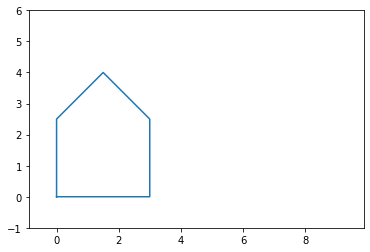

In [54]:
# plt.scatter(pt_data[:,0], pt_data[:,1]) # all rows first and second column
plt.plot(pt_data[:,0], pt_data[:,1]) # lines
plt.axis('equal')
plt.xlim(-1, 10)
plt.ylim(-1, 6)

In [55]:
# (6, 2) x (2, 2) = (6, 2) shapes
# i numeri della matrice (2, 2) determinano il tipo di trasformazione
torch.manual_seed(1)
trans_rnd = torch.rand(2, 2)
trans_rnd

tensor([[0.7576, 0.2793],
        [0.4031, 0.7347]])

In [56]:
pt_data2 = torch.mm(pt_data, trans_rnd)

(-1.0, 6.0)

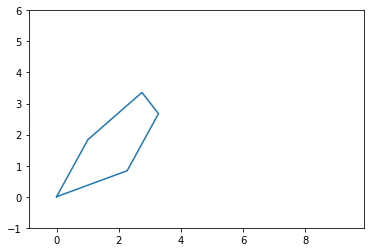

In [58]:
plt.plot(pt_data2[:,0], pt_data2[:,1]) # lines
plt.axis('equal')
plt.xlim(-1, 10)
plt.ylim(-1, 6)

**Rotazione**

In [67]:
theta = 45.0 # convert degrees in radianti
theta = torch.tensor(theta / 360 * 2 * torch.pi)

In [68]:
trans_rot = torch.tensor([[torch.cos(theta), -torch.sin(theta)],
                          [torch.sin(theta), torch.cos(theta)]])

In [69]:
pt_data3 = torch.mm(pt_data, trans_rot)

(-4.0, 6.0)

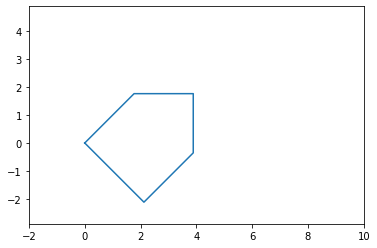

In [74]:
plt.plot(pt_data3[:,0], pt_data3[:,1]) # lines
plt.axis('equal')
plt.xlim(-2, 10)
plt.ylim(-4, 6)

**Traslazione**

In [ ]:
trans_trasl = pt_data